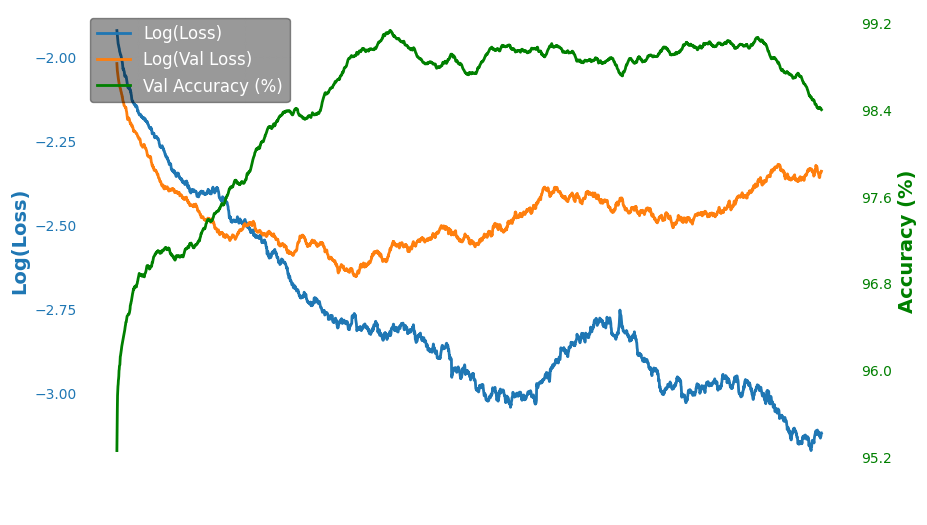

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, FuncFormatter

# Load the data from the file
data = []
with open('data.txt', 'r') as file:
    for line in file:
        # Parse the line to extract step, loss, val_loss, and val_accuracy
        parts = line.strip().split(',')
        step = int(parts[0].split()[1])
        loss = float(parts[1].split('=')[1])
        val_loss = float(parts[2].split('=')[1])
        val_accuracy = float(parts[3].split('=')[1])
        data.append([step, loss, val_loss, val_accuracy])

# Convert to NumPy array for easier handling
data = np.array(data)
steps = data[:, 0]
loss = data[:, 1]
val_loss = data[:, 2]
val_accuracy = data[:, 3]

# Replace zeros in loss and val_loss with a small positive value
epsilon = 1e-10
loss = np.maximum(loss, epsilon)
val_loss = np.maximum(val_loss, epsilon)

# Custom moving average function
def moving_average(data, n):
    """
    Computes a simple moving average.
    Args:
        data: Array of values to smooth.
        n: Window size for the moving average.
    Returns:
        Array of smoothed values.
    """
    cumsum = np.cumsum(np.insert(data, 0, 0))  # Cumulative sum of data
    return (cumsum[n:] - cumsum[:-n]) / n

# Format steps as 1k, 100k, etc.
def step_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'
    else:
        return str(int(x))

# Compute moving averages
n = 400  # Window size for moving average
log_loss_smooth = moving_average(np.log(loss), n)
log_val_loss_smooth = moving_average(np.log(val_loss), n)
val_accuracy_smooth = moving_average(val_accuracy, n) * 100  # Convert accuracy to percentages
steps_smooth = steps[n - 1:]  # Adjust steps to match smoothed values

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Log Loss and Log Val Loss
ax1.plot(steps_smooth, log_loss_smooth, label='Log(Loss)', linewidth=2, color='tab:blue')
ax1.plot(steps_smooth, log_val_loss_smooth, label='Log(Val Loss)', linewidth=2, color='tab:orange')
ax1.set_xlabel('Step', fontsize=14, fontweight='bold', color='white')
ax1.set_ylabel('Log(Loss)', fontsize=14, fontweight='bold', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue', length=0, colors='white')  # Remove tick marks, make white
ax1.tick_params(axis='x', colors='white', length=0)  # X-axis ticks white
ax1.xaxis.set_major_formatter(FuncFormatter(step_formatter))  # Format x-axis as 1k, 100k, etc.
ax1.grid(visible=True, linestyle='--', alpha=0.5, color='white')  # White gridlines
ax1.spines['top'].set_color('white')  # Keep the top spine
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white') # Keep right spine visible

ax1.xaxis.set_major_locator(MaxNLocator(8))  # Fewer ticks on x-axis
ax1.yaxis.set_major_locator(MaxNLocator(6))  # Fewer ticks on left y-axis

# Add the right axis for accuracy
ax2 = ax1.twinx()
ax2.plot(steps_smooth, val_accuracy_smooth, label='Val Accuracy (%)', linewidth=2, color='green')
ax2.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold', color='green')
ax2.tick_params(axis='y', labelcolor='green', length=0, colors='white')  # Remove tick marks, make white
ax2.yaxis.set_major_locator(MaxNLocator(6))  # Fewer ticks on right y-axis
ax2.spines['top'].set_visible(False)  # Keep the top spine
ax2.spines['bottom'].set_visible(False) 
ax2.spines['left'].set_visible(False) 
ax2.spines['right'].set_visible(False) 

# Add legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
legend = ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=12, facecolor='#00000050', framealpha=0.4)
plt.setp(legend.get_texts(), color='white')  # Make legend text white
legend.get_frame().set_edgecolor('black')  # Light grey legend border

# Set transparent background
fig.patch.set_alpha(0)
ax1.set_facecolor('none')

# Save as a transparent background PNG or display
plt.savefig('plot.png', transparent=True, dpi=300)
plt.show()
